# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [17]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [1]:
from google.colab import files
files.upload()

Saving Titanic.csv to Titanic.csv


{'Titanic.csv': b'"pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest"\n1,1,"Allen, Miss. Elisabeth Walton","female",29,0,0,"24160",211.3375,"B5","S","2",,"St Louis, MO"\n1,1,"Allison, Master. Hudson Trevor","male",0.92,1,2,"113781",151.5500,"C22 C26","S","11",,"Montreal, PQ / Chesterville, ON"\n1,0,"Allison, Miss. Helen Loraine","female",2,1,2,"113781",151.5500,"C22 C26","S",,,"Montreal, PQ / Chesterville, ON"\n1,0,"Allison, Mr. Hudson Joshua Creighton","male",30,1,2,"113781",151.5500,"C22 C26","S",,"135","Montreal, PQ / Chesterville, ON"\n1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","female",25,1,2,"113781",151.5500,"C22 C26","S",,,"Montreal, PQ / Chesterville, ON"\n1,1,"Anderson, Mr. Harry","male",48,0,0,"19952",26.5500,"E12","S","3",,"New York, NY"\n1,1,"Andrews, Miss. Kornelia Theodosia","female",63,1,0,"13502",77.9583,"D7","S","10",,"Hudson, NY"\n1,0,"Andrews, Mr. Thomas Jr","male",39,0,0,"112050",0.0000,"A36

In [6]:
df = pd.read_csv("Titanic.csv")

df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Statistik Deskriptif:


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000



Jumlah Missing Value per Kolom:


,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


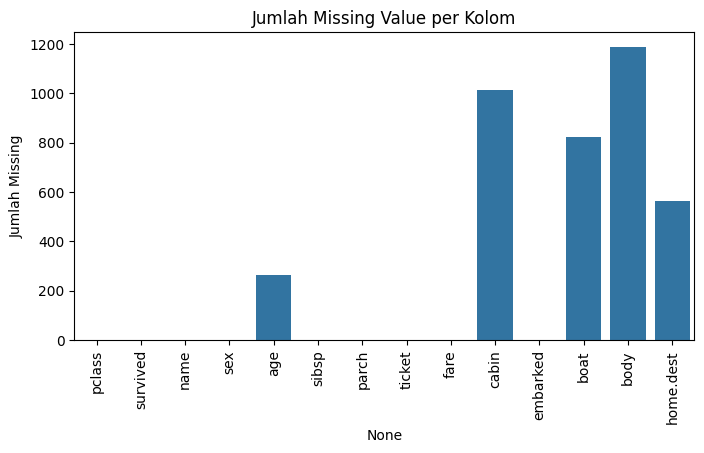

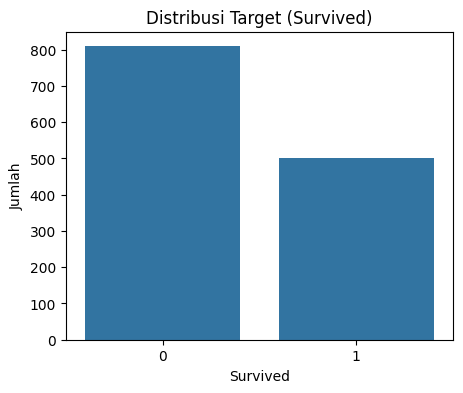

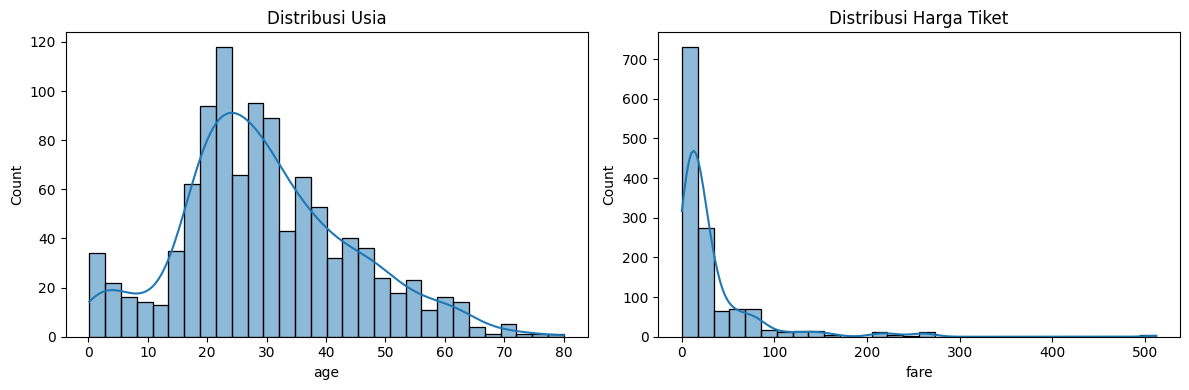

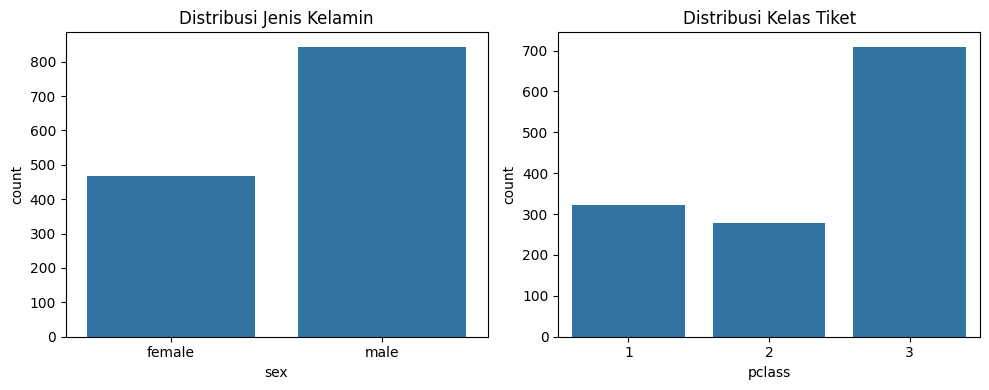

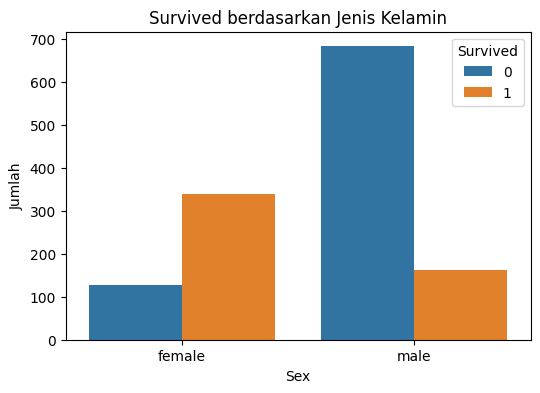

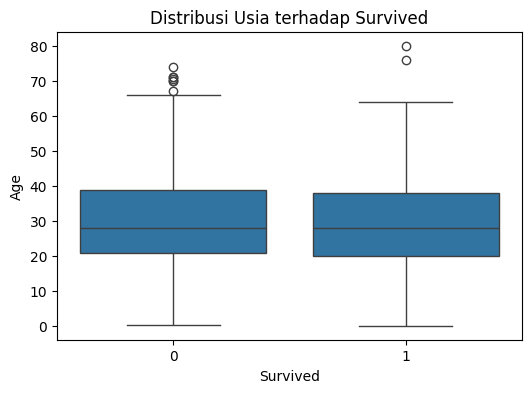

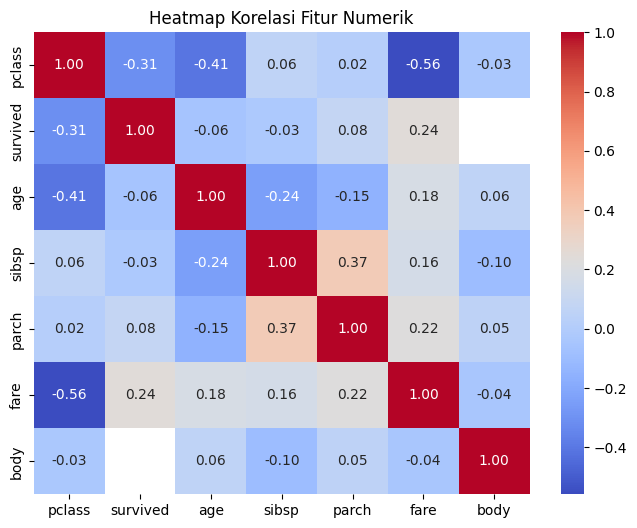

In [10]:
# 1. Statistik & Missing Data
print("Statistik Deskriptif:")
display(df.describe())

print("\nJumlah Missing Value per Kolom:")
display(df.isnull().sum())

plt.figure(figsize=(8, 4))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=90)
plt.title("Jumlah Missing Value per Kolom")
plt.ylabel("Jumlah Missing")
plt.show()

# 2. Univariat Analysis
# Target
plt.figure(figsize=(5, 4))
sns.countplot(x='survived', data=df)
plt.title("Distribusi Target (Survived)")
plt.xlabel("Survived")
plt.ylabel("Jumlah")
plt.show()

# Fitur numerik
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribusi Usia")

plt.subplot(1,2,2)
sns.histplot(df['fare'], bins=30, kde=True)
plt.title("Distribusi Harga Tiket")

plt.tight_layout()
plt.show()

# Fitur kategorikal
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x='sex', data=df)
plt.title("Distribusi Jenis Kelamin")

plt.subplot(1,2,2)
sns.countplot(x='pclass', data=df)
plt.title("Distribusi Kelas Tiket")

plt.tight_layout()
plt.show()

# 3. Bivariat Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survived berdasarkan Jenis Kelamin")
plt.xlabel("Sex")
plt.ylabel("Jumlah")
plt.legend(title="Survived")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df)
plt.title("Distribusi Usia terhadap Survived")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

# 4. Multivariat Analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
df = df.copy()

# Missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop kolom tidak relevan / missing parah (aman walau kolom tidak ada)
df = df.drop(columns=['cabin','boat','body','home.dest','name','ticket'], errors='ignore')

# Drop duplicates
df = df.drop_duplicates()

# Target & Fitur
TARGET_COL = 'survived'
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Encoding kategorikal
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if X[c].dtype != 'object']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Label encode per kolom kategorikal
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    encoders[col] = le

# Standarisasi numerik
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Gabung X + y

train_out = X_train.copy()
train_out[TARGET_COL] = y_train.values

test_out = X_test.copy()
test_out[TARGET_COL] = y_test.values

os.makedirs("titanic_preprocessing", exist_ok=True)
train_out.to_csv("titanic_preprocessing/train_preprocessed.csv", index=False)
test_out.to_csv("titanic_preprocessing/test_preprocessed.csv", index=False)

print("✅ Preprocessing selesai.")
print("Train:", train_out.shape, "| Test:", test_out.shape)
print("Saved to folder: titanic_preprocessing/")
train_out.head()

✅ Preprocessing selesai.
Train: (885, 8) | Test: (222, 8)
Saved to folder: titanic_preprocessing/


,pclass,sex,age,sibsp,parch,fare,embarked,survived
459,-0.263938,0.759961,0.911779,0.495432,-0.470414,-0.171162,0.622133,0
101,-1.431865,0.759961,0.691455,-0.519515,-0.470414,-0.123913,-1.792725,0
824,0.903988,0.759961,0.618014,-0.519515,-0.470414,-0.520280,0.622133,0
603,0.903988,-1.315858,0.397690,0.495432,0.619420,-0.289285,0.622133,1
1099,0.903988,-1.315858,-1.585228,2.525326,0.619420,-0.274848,0.622133,0
